In this file, we recreate the experiment done by Lorenz et Coecke, but rewrite them using Lambeq. 
Then, using DisCoPy methods, we extract the trained circuit parameters to see to what extent they are storing semantics. 

In [57]:
BATCH_SIZE = 30
EPOCHS = 30
LEARNING_RATE = 3e-2
SEED = 0

In [58]:
# Import all kinds of lambeq stuff 
from lambeq.backend.grammar import (Box, Cap, Cup, Diagram, Diagrammable,
                                    Functor, grammar, Id, Spider, Swap,
                                    Ty, Word)
from lambeq.backend.drawing import draw
import matplotlib.pyplot as plt
import matplotlib
from lambeq import AtomicType

# optimising the diagram to make the resulting quanutm circuit less complex
from lambeq import RemoveSwapsRewriter, RemoveCupsRewriter
from lambeq import Rewriter 

# creating the quantum circuit
from lambeq import IQPAnsatz
from pytket.extensions.qiskit import tk_to_qiskit

import numpy as np

# amplitude Encoding
from qiskit import QuantumCircuit

In [59]:
import numpy as np

BATCH_SIZE = 10
EPOCHS = 100
SEED = 2

In [60]:
def read_data(filename):
    labels, sentences = [], []
    with open(filename) as f:
        for line in f:
            t = int(line[0])
            labels.append([t, 1-t])
            sentences.append(line[1:].strip())
    return labels, sentences


train_labels, train_data = read_data('../datasets/mc_train_data.txt')
test_labels, test_data = read_data('../datasets/mc_test_data.txt')
val_labels, val_data = read_data('../datasets/mc_dev_data.txt')


# print(len(train_data), len(test_data), len(val_data))
# print(train_labels)

# print(train_data)

# print(len(train_data[0]))

# if 'man' in train_data[0]:
#     print('there we are')
#     print(train_data[0].index('man'))
#     print(train_data[0].index('sauce'))

# print(test_data)
# print(val_data)

 




In [61]:
from lambeq import BobcatParser

parser = BobcatParser(verbose='text')

raw_train_diagrams = parser.sentences2diagrams(train_data, suppress_exceptions=True)
raw_test_diagrams = parser.sentences2diagrams(test_data, suppress_exceptions=True)
raw_val_diagrams = parser.sentences2diagrams(val_data, suppress_exceptions=True)

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


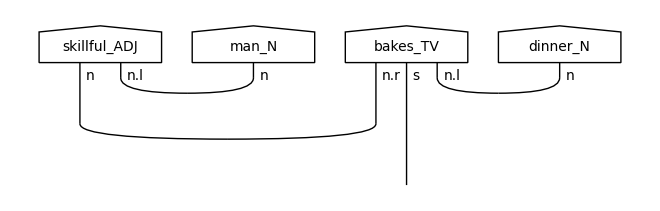

In [62]:
raw_train_diagrams[1].draw()

In [63]:
# this is another way to normalise the diagrams 

from lambeq import RemoveCupsRewriter

remove_cups = RemoveCupsRewriter()

train_diagrams = [remove_cups(diagram) for diagram in raw_train_diagrams]
dev_diagrams = [remove_cups(diagram) for diagram in raw_val_diagrams]
test_diagrams = [remove_cups(diagram) for diagram in raw_test_diagrams]



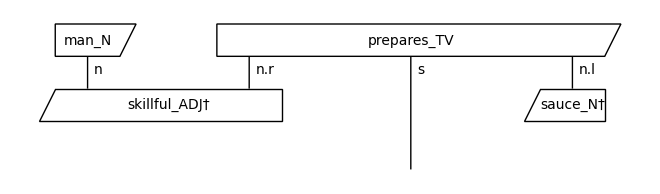

In [64]:
train_diagrams[0].draw()

In [65]:
from lambeq import AtomicType, IQPAnsatz
import numpy as np

N = AtomicType.NOUN
S = AtomicType.SENTENCE

from IQPAmplitudeEncode import IQPAmplitudeEncode

# ansatz = IQPAmplitudeEncode({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1},
#                    n_layers=1, n_single_qubit_params=3, nounParams= np.array([1,2]))



# for the train, val and test we now create the circuits 
def createAmplCircuit(tempDiag, tempSent):
    
    params = []

    # tracks which nouns is first 
    indices = []

    if 'man' in tempSent and not 'woman' in tempSent: 
        params.append(np.pi / 2)
        indices.append(tempSent.index('man'))
    if 'sauce' in tempSent: 
        params.append(0)
        indices.append(tempSent.index('sauce'))
    if 'dinner' in tempSent:
        params.append(0)
        indices.append(tempSent.index('dinner'))
    if 'woman' in tempSent: 
        params.append(np.pi / 2)    
        indices.append(tempSent.index('woman'))
    if 'meal' in tempSent: 
        params.append(0)
        indices.append(tempSent.index('meal'))
    if 'program' in tempSent: 
        params.append(np.pi)
        indices.append(tempSent.index('program'))
    if 'person' in tempSent: 
        params.append(np.pi / 2)
        indices.append(tempSent.index('person'))
    if 'application' in tempSent: 
        params.append(np.pi)
        indices.append(tempSent.index('application'))
    if 'software' in tempSent: 
        params.append(np.pi)
        indices.append(tempSent.index('software'))


    # we want to give the parameters in the correct order 
    if indices[0] > indices[1]:
        params.reverse()

    # ansatz = IQPAmplitudeEncode({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1},
    #                n_layers=1, n_single_qubit_params=3, nounParams= np.array([1,2]))

    print(params)

    return IQPAmplitudeEncode({N:1, S:1}, n_layers=1, nounParams=params)(tempDiag)

    return ansatz(tempDiag)


train_circuits = []
test_circuits = []
val_circuits = []

for i in range(len(train_data)):
    train_circuits.append(createAmplCircuit(train_diagrams[i], train_data[i]))

for i in range(len(test_data)):
    test_circuits.append(createAmplCircuit(test_diagrams[i], test_data[i]))

for i in range(len(val_data)):
    val_circuits.append(createAmplCircuit(dev_diagrams[i], val_data[i]))






# train_circuits = [ansatz(diagram) for diagram in train_diagrams]
# val_circuits =  [ansatz(diagram) for diagram in dev_diagrams]
# test_circuits = [ansatz(diagram) for diagram in test_diagrams]

# train_circuits[0].draw(figsize=(6, 8))


# now, unfortunately, it is not as easy as this when amplitude encoding. Each noun has a specific number, so each noun needs one specific ansatz!! One individual ansatz with two parameters 




[1.5707963267948966, 0]
The number of noun parameters does not fit the number of single qubit operators. 
REMOVEREMOVE JKJAJDFJ
params in circuitfunction: [[prepares_TV__n.r@s@n.l_0 prepares_TV__n.r@s@n.l_1]]
thetas:  [prepares_TV__n.r@s@n.l_0 prepares_TV__n.r@s@n.l_1]
REMOVEREMOVE JKJAJDFJ
params in circuitfunction: [[skillful_ADJ†_n@n.l__0]]
thetas:  [skillful_ADJ†_n@n.l__0]
[1.5707963267948966, 0]
The number of noun parameters does not fit the number of single qubit operators. 
REMOVEREMOVE JKJAJDFJ
params in circuitfunction: [[bakes_TV__n.r@s@n.l_0 bakes_TV__n.r@s@n.l_1]]
thetas:  [bakes_TV__n.r@s@n.l_0 bakes_TV__n.r@s@n.l_1]
REMOVEREMOVE JKJAJDFJ
params in circuitfunction: [[skillful_ADJ†_n@n.l__0]]
thetas:  [skillful_ADJ†_n@n.l__0]
[1.5707963267948966, 0]
The number of noun parameters does not fit the number of single qubit operators. 
params in circuitfunction: [[cooks_TV__n.r@s@n.l_0 cooks_TV__n.r@s@n.l_1]]
thetas:  [cooks_TV__n.r@s@n.l_0 cooks_TV__n.r@s@n.l_1]
REMOVEREMOVE JKJ

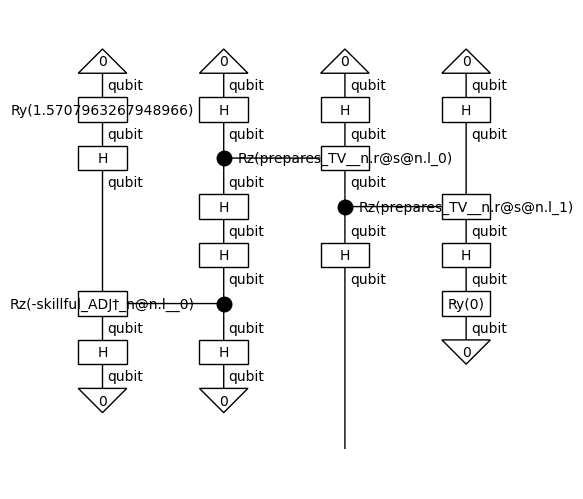

skillful_ADJ man_N prepares_TV sauce_N


In [66]:
train_circuits[0].draw()

print(train_data[0])

In [67]:
# import torch

# all_circuits = train_circuits + val_circuits

# from lambeq import PytorchModel

# model = PytorchModel.from_diagrams(all_circuits)



from lambeq import PennyLaneModel

all_circuits = train_circuits + val_circuits + test_circuits

# if no backend_config is provided, the default is used, which is the same as below
backend_config = {'backend': 'default.qubit'}  # this is the default PennyLane simulator
modelPennylane = PennyLaneModel.from_diagrams(all_circuits,
                                     probabilities=True,
                                     normalize=True,
                                     backend_config=backend_config)
modelPennylane.initialise_weights()



In [68]:
# sig = torch.sigmoid

# def accuracy(y_hat, y):
#     return torch.sum(torch.eq(torch.round(sig(y_hat)), y))/len(y)/2  # half due to double-counting

# eval_metrics = {"acc": accuracy}

In [69]:
# from lambeq import PytorchTrainer

# trainer = PytorchTrainer(
#         model=model,
#         loss_function=torch.nn.BCEWithLogitsLoss(),
#         optimizer=torch.optim.AdamW,
#         learning_rate=LEARNING_RATE,
#         epochs=EPOCHS,
#         evaluate_functions=eval_metrics,
#         evaluate_on_train=True,
#         verbose='text',
#         seed=SEED)

In [70]:
from lambeq import Dataset

train_dataset = Dataset(train_circuits,
                        train_labels,
                        batch_size=BATCH_SIZE)
                          
val_dataset = Dataset(val_circuits, val_labels)

In [71]:
def accPL(y_hat, y):
    return (torch.argmax(y_hat, dim=1) ==
            torch.argmax(y, dim=1)).sum().item()/len(y)

def loss(y_hat, y):
    return torch.nn.functional.mse_loss(y_hat, y)

In [72]:
from lambeq import PytorchTrainer
# import torch

trainerPennylane = PytorchTrainer(
    model=modelPennylane,
    loss_function=loss,
    optimizer=torch.optim.Adam,
    learning_rate=LEARNING_RATE,
    epochs=EPOCHS,
    evaluate_functions={'acc': accPL},
    evaluate_on_train=True,
    use_tensorboard=False,
    verbose='text',
    seed=SEED)

In [73]:
# trainer.fit(train_dataset, val_dataset)#, early_stopping_interval=10)

trainerPennylane.fit(train_dataset, val_dataset)

Epoch 1:    train/loss: 0.2175   valid/loss: 0.2529   train/acc: 0.5143   valid/acc: 0.6000
Epoch 2:    train/loss: 0.1500   valid/loss: 0.1955   train/acc: 0.7286   valid/acc: 0.7667
Epoch 3:    train/loss: 0.1579   valid/loss: 0.1828   train/acc: 0.7714   valid/acc: 0.7667
Epoch 4:    train/loss: 0.2462   valid/loss: 0.1730   train/acc: 0.7714   valid/acc: 0.7000
Epoch 5:    train/loss: 0.1296   valid/loss: 0.1630   train/acc: 0.7429   valid/acc: 0.7000
Epoch 6:    train/loss: 0.1740   valid/loss: 0.1484   train/acc: 0.7429   valid/acc: 0.7000
Epoch 7:    train/loss: 0.0928   valid/loss: 0.1252   train/acc: 0.7571   valid/acc: 0.7667
Epoch 8:    train/loss: 0.1093   valid/loss: 0.1067   train/acc: 0.7714   valid/acc: 0.8333
Epoch 9:    train/loss: 0.1741   valid/loss: 0.0918   train/acc: 0.9000   valid/acc: 0.9333
Epoch 10:   train/loss: 0.0243   valid/loss: 0.0835   train/acc: 0.8714   valid/acc: 0.8333
Epoch 11:   train/loss: 0.1318   valid/loss: 0.0838   train/acc: 0.8714   valid/

In [74]:
# Do the same thing, but now using the NUMPY model! 

from lambeq import NumpyModel

modelNumpy = NumpyModel.from_diagrams(all_circuits, use_jit=False)


from lambeq import BinaryCrossEntropyLoss

# Using the builtin binary cross-entropy error from lambeq
bce = BinaryCrossEntropyLoss()

accNP = lambda y_hat, y: np.sum(np.round(y_hat) == y) / len(y) / 2  # half due to double-counting
eval_metrics = {"acc": accNP}


# NUMPY model uses QuantumTrainer class 

from lambeq import QuantumTrainer, SPSAOptimizer

trainerNumpy = QuantumTrainer(
    modelNumpy,
    loss_function=bce,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.05, 'c': 0.06, 'A':0.001*EPOCHS},
    evaluate_functions=eval_metrics,
    evaluate_on_train=True,
    verbose = 'text',
    log_dir='RelPron/logs',
    seed=0
)




In [75]:
# train the numpy model 

trainerNumpy.fit(train_dataset, val_dataset)

Epoch 1:    train/loss: 0.7909   valid/loss: 1.3239   train/acc: 0.4714   valid/acc: 0.5000
Epoch 2:    train/loss: 2.2126   valid/loss: 1.4532   train/acc: 0.5714   valid/acc: 0.4333
Epoch 3:    train/loss: 0.8433   valid/loss: 1.2854   train/acc: 0.5000   valid/acc: 0.4000
Epoch 4:    train/loss: 0.5102   valid/loss: 1.0594   train/acc: 0.6000   valid/acc: 0.6000
Epoch 5:    train/loss: 0.7600   valid/loss: 0.9556   train/acc: 0.6571   valid/acc: 0.6000
Epoch 6:    train/loss: 0.7834   valid/loss: 0.9948   train/acc: 0.6000   valid/acc: 0.4667
Epoch 7:    train/loss: 0.6713   valid/loss: 0.9233   train/acc: 0.5571   valid/acc: 0.5000
Epoch 8:    train/loss: 0.7587   valid/loss: 0.8655   train/acc: 0.6286   valid/acc: 0.5000
Epoch 9:    train/loss: 0.5185   valid/loss: 0.8341   train/acc: 0.7143   valid/acc: 0.5333
Epoch 10:   train/loss: 0.6574   valid/loss: 0.8044   train/acc: 0.7143   valid/acc: 0.6000
Epoch 11:   train/loss: 0.7058   valid/loss: 0.7694   train/acc: 0.7000   valid/

In [94]:
# now for the last model, the tKet model 

BATCH_SIZE = 10
EPOCHS = 100
SEED = 2

from pytket.extensions.qiskit import AerBackend
from lambeq import TketModel

all_circuits = train_circuits + val_circuits

backend = AerBackend()
backend_config = {
    'backend': backend,
    'compilation': backend.default_compilation_pass(2),
    'shots': 8192
}

modelTK = TketModel.from_diagrams(all_circuits, backend_config=backend_config)

In [95]:
from lambeq import BinaryCrossEntropyLoss

# Using the builtin binary cross-entropy error from lambeq
bce = BinaryCrossEntropyLoss()

accTK = lambda y_hat, y: np.sum(np.round(y_hat) == y) / len(y) / 2  # half due to double-counting
eval_metrics = {"acc": accTK}

In [96]:
from lambeq import QuantumTrainer, SPSAOptimizer

trainerTK = QuantumTrainer(
    modelTK,
    loss_function=bce,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.05, 'c': 0.06, 'A':0.001*EPOCHS},
    evaluate_functions=eval_metrics,
    evaluate_on_train=True,
    verbose = 'text',
    log_dir='RelPron/logs',
    seed=0
)

In [97]:
trainerTK.fit(train_dataset, val_dataset)

Epoch 1:    train/loss: 1.8205   valid/loss: 5.7996   train/acc: 0.6500   valid/acc: 0.3667
Epoch 2:    train/loss: 0.7214   valid/loss: 1.7513   train/acc: 0.5000   valid/acc: 0.5000
Epoch 3:    train/loss: 1.2475   valid/loss: 3.0381   train/acc: 0.5857   valid/acc: 0.4000
Epoch 4:    train/loss: 2.2934   valid/loss: 1.7017   train/acc: 0.5643   valid/acc: 0.4000
Epoch 5:    train/loss: 0.6972   valid/loss: 0.5812   train/acc: 0.5071   valid/acc: 0.6000
Epoch 6:    train/loss: 0.9384   valid/loss: 0.8621   train/acc: 0.4429   valid/acc: 0.5167
Epoch 7:    train/loss: 0.9812   valid/loss: 1.6017   train/acc: 0.3714   valid/acc: 0.5333
Epoch 8:    train/loss: 0.7420   valid/loss: 0.7690   train/acc: 0.4143   valid/acc: 0.5167
Epoch 9:    train/loss: 1.1103   valid/loss: 0.7201   train/acc: 0.5143   valid/acc: 0.5667
Epoch 10:   train/loss: 0.9211   valid/loss: 0.6003   train/acc: 0.4714   valid/acc: 0.6333
Epoch 11:   train/loss: 0.4429   valid/loss: 0.5644   train/acc: 0.5214   valid/

In [109]:
print(EPOCHS)
print(SEED)
print(BATCH_SIZE)

100
2
10


In [98]:
'''
Before we look at the results of the training, let us understand what exactly these circuits are that we trained above. 

We start by extracting the parameters for the symbols learned by Coecke et al. 


'''

# The symbols are the names of the respective parameters for the respective words
smbls = modelTK.symbols

# And the weights are their respective values 
weights = modelTK.weights

# print('symbols: ', smbls)
# print('weights: ', weights)

# now, we are only interested in the noun weights 

newSmbls = []
newWeights = []

verbSmbls = []
verbWeights = []

adjSmbls = []
adjWeights = []

for i in range(len(weights)): 
    if '_N__n_' in str(smbls[i]):# or '_N†_n__' in str(smbls[i]):
        newSmbls.append(smbls[i])
        newWeights.append(weights[i].item())
    elif 'TV' in str(smbls[i]): 
        verbSmbls.append(smbls[i])
        verbWeights.append(weights[i].item())
    elif 'ADJ' in str(smbls[i]): 
        adjSmbls.append(smbls[i])
        adjWeights.append(weights[i].item())

# print('Symbols: ', newSmbls)
# print('Weights: ', newWeights)

# print('Verb symbols: ', verbSmbls)
# print('Verb weights: ', verbWeights)

# for each number of symbols (dinner_1, dinner_2), in weights, there is one weight, which is a list
        
testW = weights[0]
print(testW)

print(weights)
print(smbls)


-0.17868707715850085
[-0.17868708 -0.14022212  2.67005279  0.95724811 -0.28087722 -0.02138341
  0.34175994  0.891773    0.96366276  0.38344152  0.33910557  0.81303521
  1.00160826  0.22065261 -0.21489231  0.19426845 -0.83980792 -0.7336841
  0.48291067  0.4621499   0.97861834  0.47089037  1.70261829  0.79313877
 -0.42918693  2.12091384 -0.39977217  0.31852404  0.03226823  1.41161233
  0.09747263 -0.71626005  1.28275382 -0.24923387  0.0187898 ]
[bakes_TV__n.r@n@n.l_0, bakes_TV__n.r@n@n.l_1, bakes_TV__n.r@s@n.l_0, bakes_TV__n.r@s@n.l_1, bakes_TV†_n@n.l__0, cooks_TV__n.r@s@n.l_0, cooks_TV__n.r@s@n.l_1, debugs_TV__n.r@n@n.l@n_0, debugs_TV__n.r@n@n.l@n_1, debugs_TV__n.r@n@n.l@n_2, debugs_TV__n@n.l_0, debugs_TV†_n.r@n__0, debugs_TV†_n@n.l__0, man_N__n@n.l_0, man_N†_n@n.l__0, person_N__n@n.l_0, person_N†_n@n.l__0, prepares_TV__n.r@s@n.l_0, prepares_TV__n.r@s@n.l_1, program_N__n.r@n_0, program_N†_n.r@n__0, runs_TV__n.r@s@n.l_0, runs_TV__n.r@s@n.l_1, skillful_ADJ__n@n.l_0, skillful_ADJ†_n@n.l__0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


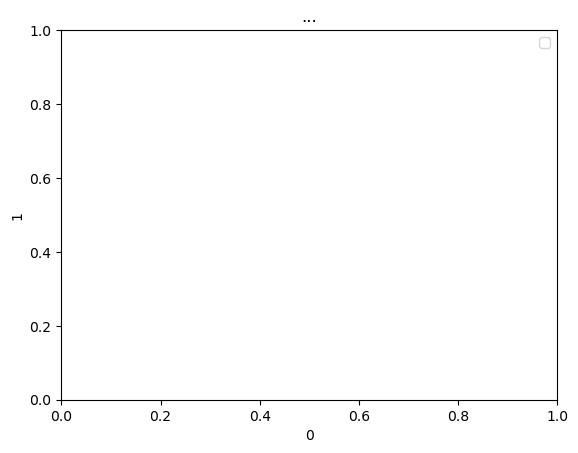

{}


In [99]:
'''
We want to see to what exact quantum states the respective nouns are mapped. We define a qiskit circuit consisting of a Rx, Rz, and Rx gate and we look at the quantum 
states that the respective nouns are mapped to. 
'''
import matplotlib
from qiskit import QuantumCircuit, Aer, execute

def getProbDist(listOfParams): 

    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(1, 1)

    # Initialize the qubit to the |0⟩ state
    initial_state = [1, 0]  # Coefficients for the |0⟩ state
    qc.initialize(initial_state, 0)

    # Apply Rx and Rz gates
    qc.rx(listOfParams[0], 0)
    qc.rz(listOfParams[1], 0) 
    qc.rx(listOfParams[2], 0)

    # Measure the qubit
    qc.measure(0, 0)  # Measure qubit 0 and store the result in classical bit 0

    # Draw the circuit (optional)
    # print("Quantum Circuit:")
    # qc.draw(output='mpl', filename = 'testtesttest.png')

    # Use the Aer simulator to execute the circuit
    simulator = Aer.get_backend('qasm_simulator')
    shots = 100000  # Number of times to run the circuit
    job = execute(qc, simulator, shots=shots)  # Execute the circuit
    result = job.result()
    counts = result.get_counts(qc)

    # Calculate the probability distribution
    prob_dist = {state: counts[state] / shots for state in counts}

    return prob_dist


NounsAndVecs = {}

for i in range(0, len(newWeights), 3): 

    params = newWeights[i:i+3]

    print(newSmbls[i:i+3])

    print(params)

    probDist = getProbDist(params)

    NounsAndVecs[str(newSmbls[i])] = probDist

    plt.text(np.sqrt(probDist['0']), np.sqrt(probDist['1']), str(newSmbls[i]), fontsize = 5)


plt.title('...')
plt.ylabel('1')
plt.xlabel('0')
plt.legend()
plt.show()
print(NounsAndVecs)



In [100]:
'''
We see that there is *no* system whatsoever. 
This might be due to the poor training as we can see in the plots below. 

I could do an animation here. And with the loss function being minimized we see the vectors of the different words changing (hopefully in some intuitive way)

Later, we can use this 'proof' kind of idea to amplitude these things prior to the execution of the algorithm. 


NEXT STEP: INVESTIGATE THE VERBS AND RECONSTRUCT THE STATES THEY ARE MAPPED TO 

'''

"\nWe see that there is *no* system whatsoever. \nThis might be due to the poor training as we can see in the plots below. \n\nI could do an animation here. And with the loss function being minimized we see the vectors of the different words changing (hopefully in some intuitive way)\n\nLater, we can use this 'proof' kind of idea to amplitude these things prior to the execution of the algorithm. \n\n\nNEXT STEP: INVESTIGATE THE VERBS AND RECONSTRUCT THE STATES THEY ARE MAPPED TO \n\n"

In [101]:
def VerbCircuit(paramList, draw = False): 
    '''
    returns probability distribution over possible states
    '''

    # create quantum circuit with three qubits 
    qc = QuantumCircuit(3)

    # Initialize the qubit to the |0⟩ state
    initial_state = [1, 0]  # Coefficients for the |0⟩ state
    qc.initialize(initial_state, 0)
    qc.initialize(initial_state, 1)
    qc.initialize(initial_state, 2)

    qc.h(range(3))

    # add CNOT gates 
    qc.crz(paramList[0], 2, 1)
    qc.crz(paramList[1], 1, 0)

    qc.h(range(3))

    if draw: 
        print(qc)
        qc.draw(output='mpl', filename='verbCircuit.png')
    
    simulator = Aer.get_backend('statevector_simulator')

    # use this if you want the *complex* statevector!!
    # 
    # job = execute(qc, simulator)
    # result = job.result()
    # statevector = result.get_statevector()
    shots = 100000  # Number of times to run the circuit
    job = execute(qc, simulator, shots=shots)  # Execute the circuit
    result = job.result()
    counts = result.get_counts(qc)

    # Calculate the probability distribution
    prob_dist = {state: counts[state] / shots for state in counts}

    return prob_dist

print(VerbCircuit([1,2], draw= True))



     ┌─────────────────┐┌───┐         ┌───────┐┌───┐
q_0: ┤ Initialize(1,0) ├┤ H ├─────────┤ Rz(2) ├┤ H ├
     ├─────────────────┤├───┤┌───────┐└───┬───┘├───┤
q_1: ┤ Initialize(1,0) ├┤ H ├┤ Rz(1) ├────■────┤ H ├
     ├─────────────────┤├───┤└───┬───┘  ┌───┐  └───┘
q_2: ┤ Initialize(1,0) ├┤ H ├────■──────┤ H ├───────
     └─────────────────┘└───┘           └───┘       


/home/bob/anaconda3/envs/code/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


{'000': 5.25780934030603e-06, '001': 1.66183287836071e-06, '010': 8.0643771242442e-07, '011': 1.66183287836071e-06, '100': 5.257933299646e-08, '101': 1.0835066732322e-07, '110': 3.4280652290523e-07, '111': 1.0835066732322e-07}


In [102]:
'''
Now, the same thing for adjectives
'''

def AdjectivesCircuit(paramList, draw = False): 
    '''
    returns probability distribution over possible states
    '''

    # create quantum circuit with three qubits 
    qc = QuantumCircuit(2)

    # Initialize the qubit to the |0⟩ state
    initial_state = [1, 0]  # Coefficients for the |0⟩ state
    qc.initialize(initial_state, 0)
    qc.initialize(initial_state, 1)

    qc.h(range(2))

    # add CNOT gates 
    qc.crz(paramList[0], 1, 0)

    qc.h(range(2))

    if draw: 
        print(qc)
        qc.draw(output='mpl', filename='adjCircuit.png')
    
    simulator = Aer.get_backend('statevector_simulator')

    # use this if you want the *complex* statevector!!
    # 
    # job = execute(qc, simulator)
    # result = job.result()
    # statevector = result.get_statevector()
    shots = 100000  # Number of times to run the circuit
    job = execute(qc, simulator, shots=shots)  # Execute the circuit
    result = job.result()
    counts = result.get_counts(qc)

    # Calculate the probability distribution
    prob_dist = {state: counts[state] / shots for state in counts}

    return prob_dist

print(AdjectivesCircuit([3.14], draw= True))



     ┌─────────────────┐┌───┐┌──────────┐┌───┐
q_0: ┤ Initialize(1,0) ├┤ H ├┤ Rz(3.14) ├┤ H ├
     ├─────────────────┤├───┤└────┬─────┘├───┤
q_1: ┤ Initialize(1,0) ├┤ H ├─────■──────┤ H ├
     └─────────────────┘└───┘            └───┘
{'00': 2.50398321889424e-06, '01': 2.49999841465942e-06, '10': 2.49601995178691e-06, '11': 2.49999841465942e-06}


Final test accuracy: 0.0


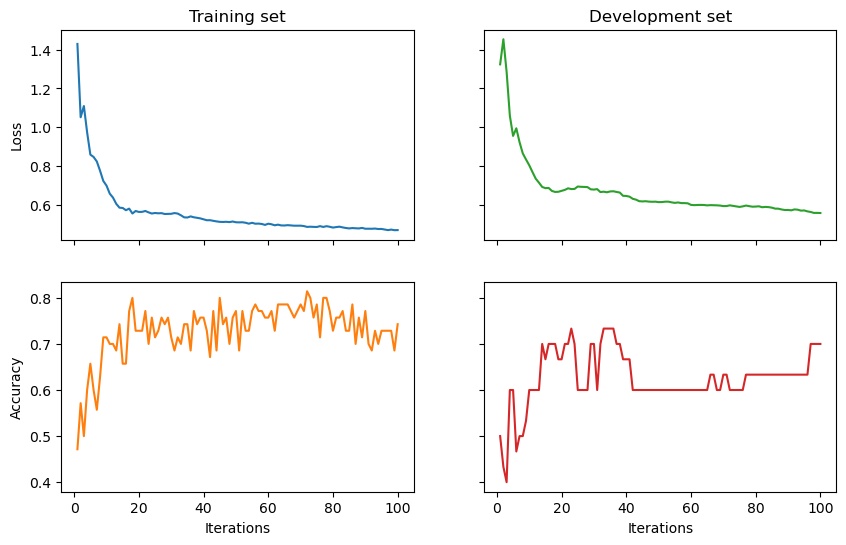

In [108]:
import matplotlib.pyplot as plt

trainer = trainerNumpy
model = modelNumpy
acc = accNP
fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2,
                                                     sharex=True,
                                                     sharey='row',
                                                     figsize=(10, 6))
ax_tl.set_title('Training set')
ax_tr.set_title('Development set')
ax_bl.set_xlabel('Iterations')
ax_br.set_xlabel('Iterations')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
range_ = np.arange(1, trainer.epochs+1)
ax_tl.plot(range_, trainer.train_epoch_costs, color=next(colours))
ax_bl.plot(range_, trainer.train_eval_results['acc'], color=next(colours))
ax_tr.plot(range_, trainer.val_costs, color=next(colours))
ax_br.plot(range_, trainer.val_eval_results['acc'], color=next(colours))

# print test accuracy
pred = model(test_circuits)
labels = torch.tensor(test_labels)

print('Final test accuracy: {}'.format(acc(pred, labels)))

Validation accuracy: 0.8


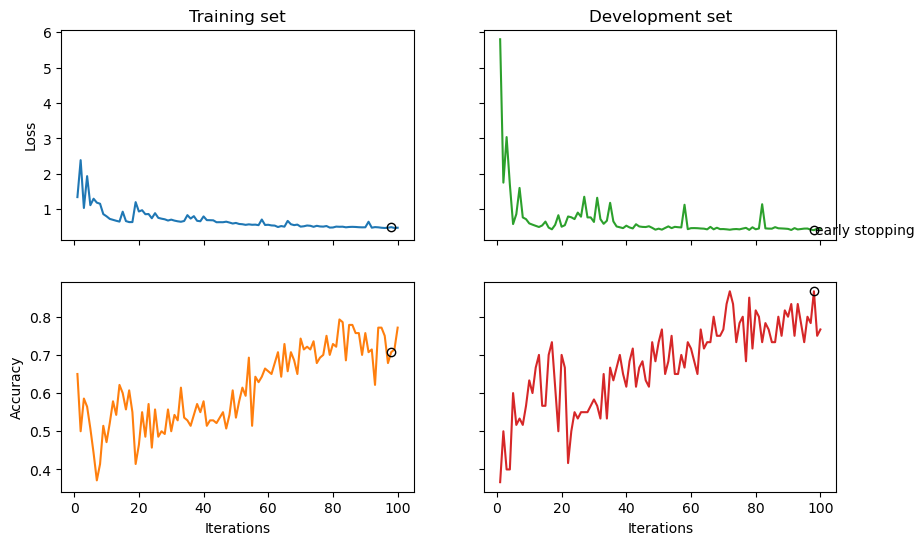

In [107]:
'''
For Tket
'''
trainer= trainerTK
model = modelTK
acc = accTK


fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(10, 6))
ax_tl.set_title('Training set')
ax_tr.set_title('Development set')
ax_bl.set_xlabel('Iterations')
ax_br.set_xlabel('Iterations')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
range_ = np.arange(1, len(trainer.train_epoch_costs)+1)
ax_tl.plot(range_, trainer.train_epoch_costs, color=next(colours))
ax_bl.plot(range_, trainer.train_eval_results['acc'], color=next(colours))
ax_tr.plot(range_, trainer.val_costs, color=next(colours))
ax_br.plot(range_, trainer.val_eval_results['acc'], color=next(colours))

# mark best model as circle
best_epoch = np.argmin(trainer.val_costs)
ax_tl.plot(best_epoch + 1, trainer.train_epoch_costs[best_epoch], 'o', color='black', fillstyle='none')
ax_tr.plot(best_epoch + 1, trainer.val_costs[best_epoch], 'o', color='black', fillstyle='none')
ax_bl.plot(best_epoch + 1, trainer.train_eval_results['acc'][best_epoch], 'o', color='black', fillstyle='none')
ax_br.plot(best_epoch + 1, trainer.val_eval_results['acc'][best_epoch], 'o', color='black', fillstyle='none')

ax_tr.text(best_epoch + 1.4, trainer.val_costs[best_epoch], 'early stopping', va='center')

# print test accuracy
model.load(trainer.log_dir + '/best_model.lt')
test_acc = acc(model(val_circuits), val_labels)
print('Validation accuracy:', test_acc.item())

In [105]:
'''
To do: 

Compare the different models to each other. 
Use different models with different Ansatze and look at the performance. Then look at the encoding of the words in the semantic spaces. 

The classical lambeq experiment does not use quantum circuits. 
It only optimises diagrams 

'''


'\nTo do: \n\nCompare the different models to each other. \nUse different models with different Ansatze and look at the performance. Then look at the encoding of the words in the semantic spaces. \n\nThe classical lambeq experiment does not use quantum circuits. \nIt only optimises diagrams \n\n'